# Overlapping Generations Model (OLG) 
### The Usefulness of the Model
The key ingredient of the OLG model is exogenous population turnover. Individuals in the population live for two periods, one in which they work and save, and the second in which they are 'old', do not work, but rather live off their savings.  
The model can be used to assess various systems of 'social security'; is there a place for the government in providing for the older generation?  
In the following, we describe the basic model setup, and go through how to solve the model analytically. A reader who is familiar with the OLG model may choose to simple skip these next steps and go straight to our coded implementation - our model setup is entirely standard, and as presented e.g. in Macro III at KU.   

### Model Setup
Time is discrete and infinite, $t = 0,1,2,...$.  
Population grows at a constant rate, n: 
    $$ L_t = L_{t-1}(1+n)$$
This implies, that in every period t, there are $L_t$ 'young' (working) individuals, and $L_{t-1}$ 'old' (non-working) individuals.  Agents derive utility from consumption in each of the two periods they are alive:
    $$U_t = u(c_{1t})+\frac{1}{1+\rho} \cdot u(c_{2t+1})$$
Where $c_{1t}$ is consumption of the young at time t, $c_{2t+1}$ is consumption of old at time $t+1$ and $\rho$ is a discount factor.  
Let $r_{t+1}$ denote the interest rate between $t$ and $t+1$. Then individuals are budget constrained in each period of their live as follows:
    $$c_{1t} + s_{t} = w_t$$ 
    $$c_{2t+1} = (1+r_{t+1})\cdot s_t$$
Substituting for s, we get the following life-time constraint:
    $$c_{1+t} + \frac{c_{2t+1}}{1+r_{t+1}} = w_t$$   
    

In every period t, agents born at time t solve the following problem: 
    $$\max_{c_{1t},c_{2t+1}} u(c_{1t})+\frac{1}{1+\rho} u(c_{2t+1})$$
Subject to the constraint from above:
    $$c_{1+t} + \frac{c_{2t+1}}{1+r_{t+1}} = w_t$$

Production is assumed to take place with CRS technology, competitive markets and profit-maximizing firms. This yields:
    $$r_t = f'(k_t)$$
    $$w_t = f(k_t)-f'(k_t)k_t$$
Where $k_t = \frac{K_t}{L_t}$. Recall, that $L_t$ refers to the *working population* at time t. 

### Solving the Household Problem
The household problem is a standard optimization problem subject to a constraint. We set up the lagrangian: 
    $$ L(c_{1t},c_{2t+1},\lambda) = u(c_{1t}) + \frac{1}{1+\rho} u(c_{2t+1}) + \lambda[w_t-c_{1t}-\frac{c_{2t+1}}{1+r_{t+1}}]$$
Differentiate wrt. consumption (in each period): 
    $$\frac{\partial L}{\partial c_{1t}} = u'(c_{1t}) -\lambda $$
    $$\frac{\partial L}{\partial c_{2t+1}} = \frac{1}{1+\rho} u'(c_{2t+1}) -\frac{\lambda}{1+r_{t+1}} $$
Equate to zero (first order conditions) and substitute for the lagrange multiplier $\lambda$ to obtain the Euler Equation: 
    $$u'(c_{1t}) = \frac{1+r_{t+1}}{1+\rho} u'(c_{2t+1})$$
    
### Characterizing Optimal Savings
Substitute the budget constrains into the Euler Equation to get:
    $$u'(w_t-s_t) = \frac{1+r_{t+1}}{1+\rho} u'((1+r_{t+1})s_t)$$
This implicitly defines optimal savings as a function of wage and interest rate, i.e. $s(w_t,r_{t+1})$

### Law of Motion for Capital 
Knowing the individual decisions allow us to aggregate economy-wide. The aggregate capital stock at time $t+1$ is equal to aggregate savings in time $t$, aggregate dissaving in time t, and un-depreciated capital carried over from time t. 
    $$K_{t+1} = S_t -K_t+(1-\delta)K_t$$ 
    $$\Rightarrow K_{t+1} = S_t - \delta K_t$$ 
        $$\Rightarrow k_{t+1}(1+n) = s_t-\delta k_t$$ 
        
Substituting for savings, substituting for wage and interest rate, and assuming $\delta = 0$: 
    $$k_{t+1} (1+n) = s(f(k_t)-k_tf'(k_t),f'(k_{t+1})$$
Which implicitly defines the law of motion for aggregate capital per worker.
        


In [1]:
import numpy as np 
import sympy as sp 
import matplotlib.pyplot as plt 

from modelproject.model import *

In [2]:
sp.init_printing()

We solve the OLG model using sympy, thus we begin by setting up symbols for the variables we use

In [3]:
rho = sp.symbols('rho')
delta = sp.symbols('delta')
n = sp.symbols('n')

c1 = sp.symbols('c_{1t}')
c2 = sp.symbols('c_{2t+1}')

r = sp.symbols('r_{t+1}')
w = sp.symbols('w_t')

s = sp.symbols('s_t')
k = sp.symbols('k_t')
kp1 = sp.symbols('k_{t+1}')

lmbda = sp.symbols('lambda')

next we define the standard log utility, and a placeholder that keeps the code general for the derivations

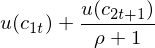

In [4]:
def log_u(c):
    return sp.log(c)

u_undetermined = sp.Function('u')


def U(c1, c2, rho, u):
    return u(c1) + 1 / (1 + rho) * u(c2)

U(c1, c2, rho, u = u_undetermined)

We define budget constraints and calculate the intertemporal constraint

In [5]:
period_1_budget = sp.Eq(w, c1 + s)
period_2_budget = sp.Eq(c2, (1+r)*s)

period_1_budget, period_2_budget

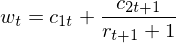

In [6]:
inter_budget = period_1_budget.subs(s, sp.solve(period_2_budget, s)[0])
inter_budget

next we set up the lagrangian and calculate the relevant first derivatives 

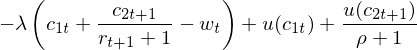

In [7]:
lagrangian = U(c1,c2,rho, u = u_undetermined) - lmbda *  (inter_budget.rhs - w)
lagrangian

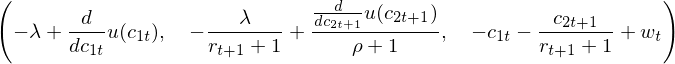

In [8]:
dc1    = sp.diff(lagrangian, c1) 
dc2    = sp.diff(lagrangian, c2) 
dlmbda = sp.diff(lagrangian, lmbda)

dc1, dc2, dlmbda

Calculate euler equation

Finally we call our `make_euler_equation` function with the derivatives of the lagrangian as inputs. We the nsubstitute in the within period budget constraints to gen an exproession in terms of savings wages and interest rate.

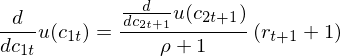

In [99]:
euler_eq = make_euler_equation(dc1, dc2, u = u_undetermined, c1 = c1, lmbda = lmbda)
euler_eq

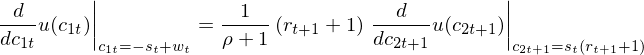

In [11]:
euler_eq = euler_eq.subs(c1, w - s).subs(c2, period_2_budget.rhs)
euler_eq

Implicitly the euler equation determines $s$, now we move to determine the evolution of captial in the economy.

This is also a good spot to set the actual functional form of $u$, we use a $log$ function here as it is analytically solveable, and explore using the square root further down.

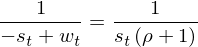

In [12]:
euler_eq = euler_eq.replace(u_undetermined, log_u).doit()
euler_eq

Next setup for firms. We show the aggregate production function but the work with the per capita normalized version to calculate expressions for the equilibrium interest rates and wages.

In [13]:
Y = sp.symbols('Y_t')
K = sp.symbols('K_t')
L = sp.symbols('L_t')

y = sp.symbols('y_t')

alpha = sp.symbols('alpha')

production_function = sp.Eq(
    Y,
    K**alpha * L**(1-alpha)
)
production_function


In [14]:
norm_prod_func = sp.Eq(y, k**alpha)
norm_prod_func

Define interest rate and wage 

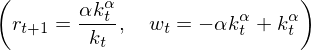

In [15]:
interest_rate = sp.Eq(r, sp.Derivative(norm_prod_func.rhs, k)).doit()
wage = sp.Eq(w, norm_prod_func.rhs - k*sp.Derivative(norm_prod_func.rhs, k)).doit()

interest_rate, wage

Finally from a standard capital depreciation identity we derive a first expression for the evolution of capital in the economy.

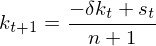

In [16]:
evolution = sp.Eq(kp1, 1/(1+n)* (s - delta*k) )
evolution

Using the euler equation and the capital evolution path we can derive the transition path of the economy

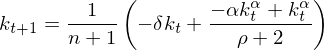

In [17]:
savings_of_k = sp.solve(euler_eq, s)[0].subs(w, wage.rhs)

# Only substitute 
if r in savings_of_k.atoms():
    savings_of_k = savings_of_k.subs(r, interest_rate.rhs)

    
transition_eq = evolution.subs(s, savings_of_k)
transition_eq

In the following section we show visualizations of the capital accumulation path for various parametrizations, including varying $\alpha$ and $\n$.

In [18]:
_transition_func = sp.lambdify((k, rho, delta, n, alpha, r), transition_eq.rhs)

def transition_func(k, alpha, rho, delta, n, r = 0):
    return _transition_func(k, rho, delta, n , alpha, r)

In [19]:
_equilibrium = sp.lambdify(
    (alpha, n, rho, delta),
    sp.solve(transition_eq.subs(kp1, k), k)[0]
            )

def equilibrium(alpha, n, rho, delta):
    return _equilibrium(alpha, n, rho, delta)

Visualizing variation in $\alpha$

Text(0.5,1,'Transition curves for varying $\\alpha$')

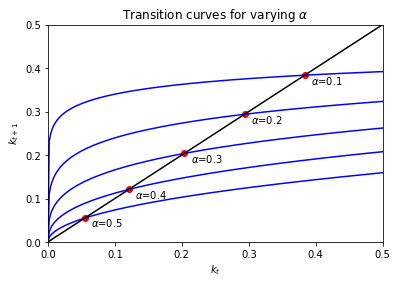

In [20]:
xr = np.linspace(0,2,1000)
_r = 0.05
_d = 0.02
_n = 0.02

for _a in np.linspace(0.1, 0.5, 5):

    res = [transition_func(k = x, alpha = _a, rho = _r, delta = _d, n = _n) for x in xr]
    kstar = equilibrium(alpha = _a, rho = _r, n = _n, delta = _d)
    plt.plot(xr, res, color = 'blue', alpha = 1)    
    plt.scatter([kstar], [kstar], color = 'red')
    plt.annotate(f'$\\alpha$={round(_a,2)}', xy= (kstar + 0.01, kstar - 0.02))

plt.plot(xr, xr, color = 'black')
plt.xlim(0,0.5)
plt.ylim(0,0.5)
plt.xlabel('$k_t$')
plt.ylabel('$k_{t+1}$')
plt.title('Transition curves for varying $\\alpha$')

Visualizing variation in $n$

Text(0.5,1,'Transition curves for varying $n$')

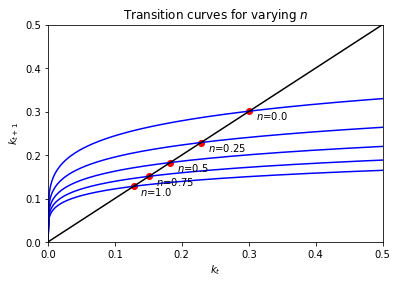

In [21]:
xr = np.linspace(0,2,1000)
_r = 0.05
_d = 0.02
_a = 0.2
#_n = 0.02

for _n in np.linspace(0, 1, 5):

    res = [transition_func(k = x, alpha = _a, rho = _r, delta = _d, n = _n) for x in xr]
    kstar = equilibrium(alpha = _a, rho = _r, n = _n, delta = _d)
    plt.plot(xr, res, color = 'blue', alpha = 1)    
    plt.scatter([kstar], [kstar], color = 'red')
    plt.annotate(f'$n$={round(_n,2)}', xy= (kstar + 0.01, kstar - 0.02))

plt.plot(xr, xr, color = 'black')
plt.xlim(0,0.5)
plt.ylim(0,0.5)
plt.xlabel('$k_t$')
plt.ylabel('$k_{t+1}$')
plt.title('Transition curves for varying $n$')

Visualizing the convergence to st.st.

In [22]:
k_ = 0.0001
xr = range(10)
xr2 = np.linspace(0,1,1000)

_r = 0.05
_d = 0.05
_a = 0.5
_n = 0


out = list()

for _ in xr:
    k_ = transition_func(k = k_, alpha = _a, rho = _r, delta = _d, n = _n)
    out.append(k_)


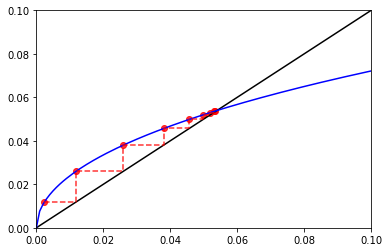

In [23]:
res = [transition_func(k = x, alpha = _a, rho = _r, delta = _d, n = _n) for x in xr2]

plt.plot(xr, xr, color = 'black')
plt.plot(xr2, res, color = 'blue', alpha = 1)    
plt.step(out[:-1], out[1:], where = 'post', color = 'red', linestyle = '--', alpha = 0.8)
plt.scatter(out[:-1], out[1:], color = 'red', alpha = 0.8)

plt.xlim(0,0.1)
plt.ylim(0,0.1)

## Part 2 - numerical solution with sqrt utility 

In the section below we first show that there is no analytical solution to the OLG model when the within period utility is given by $u(c)=\sqrt(c)$. We then show graphically that even though no analytical solution exists, it can be found numerically, and we iteratively identify the aproximate value of $k^*$ with square root utility.

The first steps are identical to the ones covered above.

In [24]:
def sqrt_u(c):
    return sp.sqrt(c)

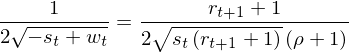

In [25]:
euler_eq = make_euler_equation(dc1, dc2, u = u_undetermined, c1 = c1, lmbda = lmbda)
euler_eq = euler_eq.subs(c1, w - s).subs(c2, period_2_budget.rhs)
euler_eq = euler_eq.replace(u_undetermined, sqrt_u).doit()
euler_eq

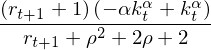

In [26]:
savings_of_k = sp.solve(euler_eq, s)[0].subs(w, wage.rhs)
savings_of_k

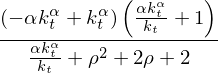

In [27]:
savings_of_k = savings_of_k.subs(r, interest_rate.rhs)
savings_of_k

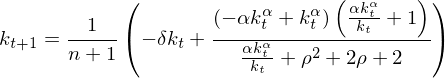

In [28]:
transition_eq = evolution.subs(s, savings_of_k)
transition_eq

In [29]:
_tf2 = sp.lambdify((k, alpha, rho, delta, n), transition_eq.rhs)
def tf2(k, alpha, rho, delta, n):
    return _tf2(k, alpha, rho, delta, n)


Notice now the analytical solution is empty. 

In [30]:
sp.solve(transition_eq.subs(kp1, k), k)

Here we compare the steady state of a model with log utility and one with square root utility, notice how the change in utility drastically changes the steady state level of capital.

C:\Users\qsd161\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\__init__.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """


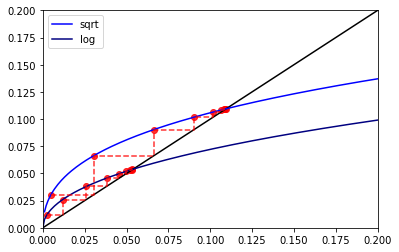

In [70]:
k_ = 0.0001
k_2 = 0.0001

xr = range(10)
xr2 = np.linspace(0,1,1000)

_r = 0.05
_d = 0.05
_a = 0.5
_n = 0


out = list()
out2 = list()

for _ in xr:
    k_ = tf2(k = k_, alpha = _a, rho = _r, delta = _d, n = _n)
    k_2 = transition_func(k = k_2, alpha = _a, rho = _r, delta = _d, n = _n)
    
    out.append(k_)
    out2.append(k_2)
    
res = [tf2(k = x, alpha = _a, rho = _r, delta = _d, n = _n) for x in xr2]
res2 = [transition_func(k = x, alpha = _a, rho = _r, delta = _d, n = _n) for x in xr2]

plt.plot(xr, xr, color = 'black')
plt.plot(xr2, res, color = 'blue', alpha = 1, label = 'sqrt')    
plt.plot(xr2, res2, color = 'navy', alpha = 1, label = 'log')    

plt.step(out[:-1], out[1:], where = 'post', color = 'red', linestyle = '--', alpha = 0.8)
plt.scatter(out[:-1], out[1:], color = 'red', alpha = 0.8)

plt.step(out2[:-1], out2[1:], where = 'post', color = 'red', linestyle = '--', alpha = 0.8)
plt.scatter(out2[:-1], out2[1:], color = 'red', alpha = 0.8)


plt.xlim(0,0.2)
plt.ylim(0,0.2)

plt.legend()


Finally using the simple convergence algorithm shown in the figure we can approximate the steady state level of capital in an economy characterized by square root utility.

In [98]:
k_ = 0.0001
for _ in range(10000):
    k_ = tf2(k = k_, alpha = _a, rho = _r, delta = _d, n = _n)

print(k_)

0.10949660035925014
